In [1]:
import pandas as pd
from sklearn import cluster, datasets
import numpy as np
import scipy
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cluster_data=pd.read_csv("CleanedLoandata.csv",encoding = "ISO-8859-1")
clustering=cluster_data[['loan_amnt','int_rate','term','emp_length','home_ownership','annual_inc','verification_status','purpose','addr_state','dti','delinq_2yrs','Risk_Score','inq_last_6mths','open_acc','revol_bal','revol_util','total_acc','mths_since_last_major_derog','funded_amnt_inv','installment','application_type','pub_rec']]


C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,41,51,110,121,122,123,126,127,128,131,137,138,139,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

feature_cluster=clustering[['loan_amnt','funded_amnt_inv','installment','term', 'emp_length',
                                  'addr_state', 'dti','verification_status','delinq_2yrs','revol_util',
                                'inq_last_6mths', 'open_acc','pub_rec','total_acc',
                                'Risk_Score']]


In [4]:
k_means=cluster.KMeans(n_clusters=4)
k_means.fit(feature_cluster)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print(k_means.labels_)

[2 2 2 ..., 3 3 1]


In [6]:
df2=pd.DataFrame(k_means.labels_,columns=['label'])
df=pd.concat([clustering, df2], axis=1)

In [7]:
df['label'].value_counts()

3    582454
0    501713
1    371879
2    190727
Name: label, dtype: int64

In [8]:
Cluster0=df[df.label==0]
Cluster0.drop('label',axis=1)
Cluster0.to_csv('Cluster0.csv',index=False)

In [13]:
Cluster1=df[df.label==1]
Cluster1.drop('label',axis=1)
Cluster1.to_csv('Cluster1.csv',index=False)

In [9]:
Cluster2=df[df.label==2]
Cluster2.drop('label',axis=1)
Cluster2.to_csv('Cluster2.csv',index=False)

In [10]:
Cluster3=df[df.label==3]
Cluster3.drop('label',axis=1)
Cluster3.to_csv('Cluster3.csv',index=False)

In [6]:
from sklearn.externals import joblib
joblib.dump(k_means,'kmeanscluster.pkl')

['kmeanscluster.pkl']

In [78]:
tsnedata=cluster_data
tsnedata=tsnedata._get_numeric_data()

In [83]:
chakku=tsnedata.loc[rndperm[:n_sne],feat_cols]

In [ ]:
# chakku.isnull().sum()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 8574.141590
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.366966
[t-SNE] Error after 300 iterations: 1.366966


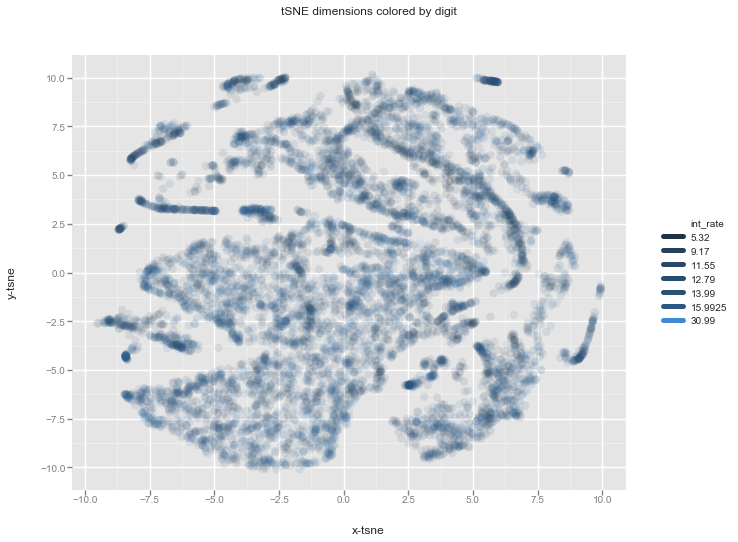

<ggplot: (87846260081)>

In [86]:
from sklearn.manifold import TSNE
from ggplot import *
import numpy as np
n_sne = 8000
rndperm=np.random.permutation(tsnedata.shape[0])
#time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tsnedata.loc[rndperm[:n_sne],feat_cols].values)
#print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
df_tsne = tsnedata.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='int_rate') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [ ]:
K = range(1,15)
KM = [kmeans(feature_cluster,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

In [ ]:
kIdx = 3
### Bend graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='*', markersize=10, 
    markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('Bend for KMeans clustering')
plt.show()